# Определение перспективного тарифа для телеком компании «Мегалайна»

В целях учета при корректировке рекламного бюджета, проведен предварительный анализ какой из тарифов «Смарт» или «Ультра» приносит компании больше денег.
Анализ проведен на небольшой выборке клиентов (500 пользователей «Мегалайна», с информацией о том, кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год).
Проанализированы следующие тарифные планы:
- Тариф «Смарт»: ежемесячная плата: 550 рублей. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика. Стоимость услуг сверх тарифного пакета: минута разговора: 3 рубля, сообщение: 3 рубля, 1 Гб интернет-трафика: 200 рублей.
- Тариф «Ультра»: ежемесячная плата: 1950 рублей, Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика. Стоимость услуг сверх тарифного пакета: минута разговора: 1 рубль, сообщение: 1 рубль, 1 Гб интернет-трафика: 150 рублей.

Согласно правилам «Мегалайн», при тарификации значения минут и мегабайтов округляются вверх до целого.

В целях достижения цели исследования будут реализованы следующие этапы:

Считывание предоставленных данных в DataFrame Pandas, изучение общей информации о данных.
Предобработка данных, заполнение отсутствующих значений, изменение типов данных.
Получение новых данных по исходным, в том числе количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам, помесячную выручку с каждого пользователя.
Описано поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц, посчитаны среднее количество, дисперсию и стандартное отклонение. Построены гистограммы. Описаны распределения.
Проверены гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
По результатам анализа поведения клиентов и сделан вывод — какой тариф лучше.
В целях достижения цели исследования будут реализованы следующие этапы:
 1. Считывание предоставленных данных в DataFrame Pandas, изучение общей информации о данных.
 2. Предобработка данных, анализ и обработка отсутствующих значений, изменение типов данных.
 3. Получение новых данных по исходным, в том числе месяца активности, общей выручки по абоненту за месяц. Анализ полученных данных, в том числе получение статистических характеристик, описание распределения данных.
 4. Проверка сформированных гипотез.
Анализ осуществлен аналитиком компании «Мегалайн» — федерального оператора сотовой связи. 

In [1]:
# Импорт необходимых библиотек
import pandas as pd
from scipy import stats as st
from matplotlib import pyplot as plt
from math import factorial, ceil
from functools import reduce
import numpy as np

In [2]:
# Чтение необходимых данных
data_calls = pd.read_csv('/datasets/calls.csv') #База звонков
data_internet = pd.read_csv('/datasets/internet.csv') #База использования трафика
data_messages = pd.read_csv('/datasets/messages.csv') #База отправленных сообщений
data_tariffs = pd.read_csv('/datasets/tariffs.csv') #Информация о тарифах
data_users = pd.read_csv('/datasets/users.csv') # Информация об абонентах

In [3]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [5]:
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [7]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [8]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Вывод
Полученные данные состоят из пяти таблиц. 
- Таблица с данными о звонках состоит из 202 тыс. строк и 5 столбцов, занимает более 6.2 Мбайт памяти. Названия столбцов не требуют изменений. Столбец call_date имеет тип object, нужно будет привести к типу datetime;
- Таблица с данными об использовании трафика состояит из 149 тыс. строк и 5 столбцов, занимает более 5,7 Мбайт. В таблице присутствует столбец Unnamed: 0, который содержит порядковые номера строк. Учитывая, что указанный столбец не содержит дополнительной информации он будет удален. Столбец session_date имеет тип object, нужно будет привести к типу datetime;
- Таблица с данными об отправленных сообщениях состоит из 123 тыс. строк и 3 столбцов, занимает более 2,8 Мбайт. Столбец message_date имеет тип object, нужно будет привести к типу datetime;
- Таблица с данными о тарифах состоит из 2 строк и 8 столбцов, занимает около 250 байт. Предобработка данных не требуется;
- Таблица с данными об абонентах состоит из 500 строк и 8 столбцов, занимает около 31 Кбайта. Столбцы churn_date и reg_date имеют тип object, изменим на datetime. 
Также будут удалены строки с нулевыми данными о звонках и использованном трафике.

## Подготовка данных

In [9]:
# Изменим тип данных столбца 'call_date'
data_calls['call_date'] = pd.to_datetime(
                            data_calls['call_date'], format='%Y-%m-%dT%')
# Округлим вверх столбец 'duration'  
data_calls['duration'] = data_calls['duration'].apply(ceil)

In [10]:
# Оставим только строки с ненулевыми значениями в столбце duration
data_calls = data_calls[data_calls['duration']!=0].reset_index(drop=True)

In [11]:
# Удалим столбец Unnamed
del data_internet['Unnamed: 0']
# Изменим тип данных столбца 'session_date'
data_internet['session_date'] = pd.to_datetime(
                            data_internet['session_date'], format='%Y-%m-%dT%')
# Округлим вверх столбец 'duration'  
data_internet['mb_used'] = data_internet['mb_used'].apply(ceil)

In [12]:
# Оставим только строки с ненулевыми значениями в столбце mb_used
data_internet = data_internet[data_internet['mb_used']!=0].reset_index(drop=True)

In [13]:
# Изменим тип данных столбца 'message_date'
data_messages['message_date'] = pd.to_datetime(
                            data_messages['message_date'], format='%Y-%m-%dT%')

In [14]:
# Изменим тип данных столбца 'message_date'
data_users['reg_date'] = pd.to_datetime(
                            data_users['reg_date'], format='%Y-%m-%dT%')
data_users['churn_date'] = pd.to_datetime(
                            data_users['churn_date'], format='%Y-%m-%dT%')

In [15]:
#Добавим столбец с месяцем
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month


In [16]:
# Создадим сводные таблицы по звонкам, трафику и сообщениям.
calls_stat = data_calls.pivot_table(index=['user_id','month'], values='duration', aggfunc=['count','sum'])
calls_stat.columns = ['count_calls','sum_calls']
internet_stat = data_internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc=['count','sum'])
internet_stat.columns = ['count_internet','sum_mb']
messages_stat = data_messages.pivot_table(index=['user_id','month'], values='id', aggfunc='count')
messages_stat.columns = ['count_messages']
# Объединим созданные сводныетаблицы в одну
all_stat = calls_stat.join([internet_stat, messages_stat]).copy()


In [17]:
# Функция вычисления общей суммы затрат абонента в месяц
def cost_calls(data):
    cost_calls = 0
    cost_internet = 0
    cost_messages = 0
    user_id = data.name[0]
    user_tariff = data_users.query('user_id==@user_id')['tariff'].to_list()
    if user_tariff == ['ultra']:
        price_minute_call = 1
        price_mb = 150
        price_message = 1
        price_tariff = 1950
        free_minutes = 3000
        free_mb = 30720
        free_messages = 1000
    else:
        price_minute_call = 3
        price_mb = 200
        price_message = 3
        price_tariff = 550
        free_minutes = 500
        free_mb = 15360
        free_messages = 50
        
    if data['sum_calls'] > free_minutes:
        cost_calls = (data['sum_calls'] - free_minutes) * price_minute_call
    else:
        cost_calls = 0
    if data['sum_mb'] > free_mb:
        cost_internet = ceil((data['sum_mb'] - free_mb) / 1024) * price_mb
    else:
        cost_internet = 0
    if data['count_messages'] > free_messages:
        cost_messages = (data['count_messages'] - free_messages) * price_message
    else:
        cost_messages = 0
    all_cost = price_tariff + cost_calls + cost_internet + cost_messages
    return all_cost
all_stat['all_cost'] = all_stat.apply(cost_calls, axis=1)


In [18]:
# Добавим столбец с тарифом и городом
def tariff(data):
    user_id = data.name[0]
    tariff = data_users.query('user_id==@user_id')['tariff'].to_list()[0]
    return tariff
def city(data):
    user_id = data.name[0]
    city = data_users.query('user_id==@user_id')['city'].to_list()[0]
    return city
all_stat['tariff'] = all_stat.apply(tariff, axis=1)
all_stat['city'] = all_stat.apply(city, axis=1)

In [19]:
# Заменим пустые значения на нули
all_stat = all_stat.fillna(value=0)
all_stat

count_calls  sum_calls  count_internet   sum_mb  \
user_id month                                                    
1000    5             17.0      159.0             4.0   2256.0   
        6             28.0      172.0            44.0  23257.0   
        7             41.0      340.0            28.0  14016.0   
        8             42.0      408.0            27.0  14070.0   
        9             46.0      466.0            25.0  14581.0   
...                    ...        ...             ...      ...   
1498    10            30.0      247.0            49.0  20604.0   
1499    9              8.0       70.0             4.0   1848.0   
        10            44.0      449.0            43.0  17809.0   
        11            62.0      612.0            39.0  17984.0   
        12            56.0      492.0            40.0  13077.0   

               count_messages  all_cost tariff         city  
user_id month                                                
1000    5                22.0    1950.0  ultra    Краснодар  
        6                60.0    1950.0  ultra    Краснодар  
        7                75.0    1950.0  ultra    Краснодар  
        8                81.0    1950.0  ultra    Краснодар  
        9                57.0    1950.0  ultra    Краснодар  
...                       ...       ...    ...          ...  
1498    10               42.0    1750.0  smart  Владикавказ  
1499    9                11.0     550.0  smart        Пермь  
        10               48.0    1150.0  smart        Пермь  
        11               59.0    1513.0  smart        Пермь  
        12               66.0     598.0  smart        Пермь  

[3168 rows x 8 columns]

### Вывод:
В ходе подготовки данных были преобразованы типы столбцов, содержащих даты, удалены нулевые записи в таблицах, содержащих информацию о количестве звонков и использовании трафика. Были добавлены дополнительные столбцы с месяцем и выручкой по абоненту. Сформирована сводная таблица, содержащая данные о количестве и продолжительности звонков, количестве сессий и объёме использованного трафика, количестве сообщений, выручке, городу абонента. Мультииндексом указанной таблицы является идентификатор абонента и месяц года.
Следует отметить, что представленные данные о совершеннных звонках содержали 39,6 тыс. или 19,6% записей с нулевой продолжительностью звонков, данные об использовании интернет трафика содержали 19,6 тыс. или 13,2% записей с нулевым объёмом. В целях анализа они были удалены. Вместе с тем, предлагаем проанализировать служивщуюся ситуацию, так как одной из причин может явится наличие проблем в установлении соединения.

## Анализ данных

In [20]:
# Рассчитаем среднее количество, дисперсию и стандартное отклонение.
all_stat.pivot_table(index='tariff', values=['sum_calls', 'sum_mb', 'count_messages','all_cost'],
                        aggfunc=['mean', 'var', 'std'])

mean                                                     var  \
           all_cost count_messages   sum_calls        sum_mb       all_cost   
tariff                                                                        
smart   1295.790635      33.392166  419.440342  16231.462404  675434.092633   
ultra   2072.439282      48.759240  547.755016  19489.672650  146559.899851   

                                                          std                 \
       count_messages     sum_calls        sum_mb    all_cost count_messages   
tariff                                                                         
smart      799.206047  35718.128534  3.461495e+07  821.847974      28.270233   
ultra     2171.726328  93338.428291  1.027595e+08  382.831425      46.601785   

                                  
         sum_calls        sum_mb  
tariff                            
smart   188.992403   5883.447131  
ultra   305.513385  10137.035902

sum_calls


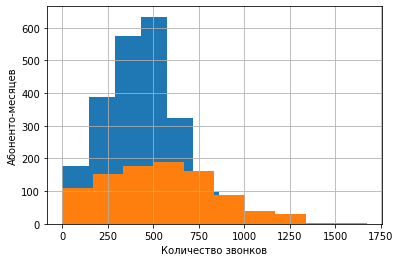

sum_mb


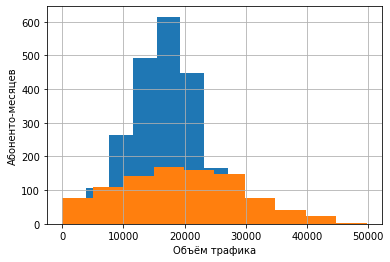

count_messages


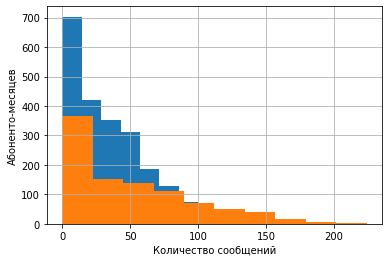

all_cost


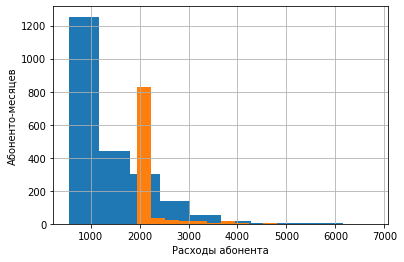

In [29]:
list_parametrs = ['sum_calls','sum_mb','count_messages', 'all_cost']
x_name = {'sum_calls':'Количество звонков', 'sum_mb':'Объём трафика', 'count_messages':'Количество сообщений', 'all_cost':'Расходы абонента'}
y_name = 'Абоненто-месяцев'
for parametr in list_parametrs:
    print(parametr)
    plt.xlabel(x_name[parametr])
    plt.ylabel(y_name)
    all_stat.query('tariff=="smart"')[parametr].hist()
    all_stat.query('tariff=="ultra"')[parametr].hist()
    plt.show()

### Вывод: 
Согласно полученным данным выборка, состоящая из абонентов тарифного плана "Смарт", характеризуется следующими показателями: среднемесячное значение длительности звонков - 419 минут, использованного трафика - 16 231 Мбайт, отправленных сообщений - 33 шт., выручки - 1 294 руб. Стандартное отклонение составляет 189 минут, 5883 Мбайт, 28 шт. и 822 руб. соответственно. Выборка, состоящая из абонентов тарифного плана "Ультра", характеризуется следующими показателями: среднемесячное значение длительности звонков - 548 минут, использованного трафика - 19 490 Мбайт, отправленных сообщений - 49 шт., выручки - 2 072 руб. Стандартное отклонение составляет 306 минут, 10 137 Мбайт, 47 шт. и 383 руб. соответственно. 
Согласно построенным графикам количество звонков и использованного трафика имеют нормальное распределение. График количества отправленных сообщений больше похож на распределение Пуассона.

## Проверка гипотез

### Гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

In [22]:
# Сформируем выборки абонентов по тарифным планам
smart = all_stat.query('tariff=="smart"')['all_cost']
ultra = all_stat.query('tariff=="ultra"')['all_cost']

In [23]:
alpha = 0.05 # зададим критический уровень статистической значимости

results = st.ttest_ind(smart, ultra)
print('p-значение:', results.pvalue) # Вывед на экран получившееся p-значения

if (results.pvalue < alpha): # Сравним получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.")
else:
    print("Не получилось отвергнуть нулевую гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.")

p-значение: 1.399451579946976e-152
Отвергаем нулевую гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.


В качестве нулевой гипотезы была принята гипотеза о том, что средняя выручка абонентов тарифных планов "Смарт" и "Ультра" равны. В качестве альтернативной, что не равны. Для проверки гипотезы использовался p - уровень значимости. Полученное значение p-value говорит о том, что вероятность случайного получения таких различий по средней выручке абонентов тарифных планов "Смарт" и "Ультра" практически нулевая. Полученные данные позволяют отвергнуть гипотезу о равенстве средней выручки абонентов тарифных планов "Смарт" и "Ультра".

### Гипотеза о том, что средняя выручка по абонентам Москвы равна средней выручке по абонентам из других регионов.

In [24]:
# Сформируем выборки абонентов из Москвы и из гругих городов
revenue_abonents_Moscow = all_stat.query('city=="Москва"')['all_cost']
revenue_abonents_other = all_stat.query('city!="Москва"')['all_cost']

In [25]:
alpha = 0.05 # зададим критический уровень статистической значимости

results = st.ttest_ind(revenue_abonents_Moscow, revenue_abonents_other)
print('p-значение:', results.pvalue) # Вывед на экран получившегося p-значения

if (results.pvalue < alpha): # Сравним получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу о том, что средняя выручка абонентов Москвы и других регионов равны.")
else:
    print("Не получилось отвергнуть нулевую гипотезу о том, что средняя выручка абонентов Москвы и других регионов равны.")

p-значение: 0.44703780668956883
Не получилось отвергнуть нулевую гипотезу о том, что средняя выручка абонентов Москвы и других регионов равны.


В качестве нулевой гипотезы была принята гипотеза о том, что средняя выручка абонентов Москвы и других регионов равны. В качестве альтернативной, что не равны. Для проверки гипотезы использовался p - уровень значимости. Полученное значение p-value говорит о том, что хотя средняя выручка абонентов из Москвы и абонентов из других регионов неодинаковы, с вероятностью в почти 44% такое различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средней выручкой.

### Выводы
   Уважаемые сотрудники компании "Мегалайн", спасибо за предоставленные данные. Проведен анализ данных об активности в 2018 году 500 абонентов тарифов «Смарт» или «Ультра» в целях возможного учета при корректировке рекламного бюджета.
   Следует отметить, что представленные данные о совершеннных звонках содержали 39,6 тыс. или 19,6% записей с нулевой продолжительностью звонков, данные об использовании интернет трафика содержали 19,6 тыс. или 13,2% записей с нулевым объёмом. В целях анализа они были удалены. Вместе с тем, предлагаем проанализировать служивщуюся ситуацию, так как одной из причин может явится наличие проблем в установлении соединения.
   Согласно полученным данным выборка, состоящая из абонентов тарифного плана "Смарт", характеризуется следующими показателями: среднемесячное значение длительности звонков - 419 минут, использованного трафика - 16 231 Мбайт, отправленных сообщений - 33 шт., выручки - 1 294 руб. Стандартное отклонение составляет 189 минут, 5883 Мбайт, 28 шт. и 822 руб. соответственно. Выборка, состоящая из абонентов тарифного плана "Ультра", характеризуется следующими показателями: среднемесячное значение длительности звонков - 548 минут, использованного трафика - 19 490 Мбайт, отправленных сообщений - 49 шт., выручки - 2 072 руб. Стандартное отклонение составляет 306 минут, 10 137 Мбайт, 47 шт. и 383 руб. соответственно. Согласно построенным графикам количество звонков и использованного трафика имеют нормальное распределение. График количества отправленных сообщений больше похож на распределение Пуассона.
   Была проведена проверка ряда гипотез. Полученные данные позволяют отвергнуть гипотезу о равенстве средней выручки абонентов тарифных планов "Смарт" и "Ультра", при этом статистически значимого подтверждения наличия различий между средней выручкой абонентов из Москвы и абонентов из других регионов не получено.
   Согласно полученным данным, в 2018 году абонент тарифного плана "Ультра" приносил компании больше денег чем абонент тарифного плана "Смарт".
   Надеюсь, что полученные результаты будут полезны при корректировке рекламного бюджета.